## importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
tickersSeries = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol']

In [3]:
tickersList = tickersSeries.to_list()

## downloading the stock data using yfinance open-source library

In [4]:
stockTicker = input("enter the stock ticker: ").upper()
rawStockData = yf.download(stockTicker, '1995-01-01', '2022-10-21')

rawStockData.head()

enter the stock ticker: foxa
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-12,38.000000,38.000000,38.000000,38.000000,36.012314,10000
2019-03-13,39.000000,39.900002,38.700001,39.750000,37.670776,20477400
2019-03-14,39.750000,41.400002,39.750000,40.650002,38.523708,6248600
2019-03-15,41.380001,41.869999,41.240002,41.700001,39.518780,7107300
2019-03-18,41.950001,41.950001,41.049999,41.700001,39.518780,4020900


## visualizing the data (closing prices)

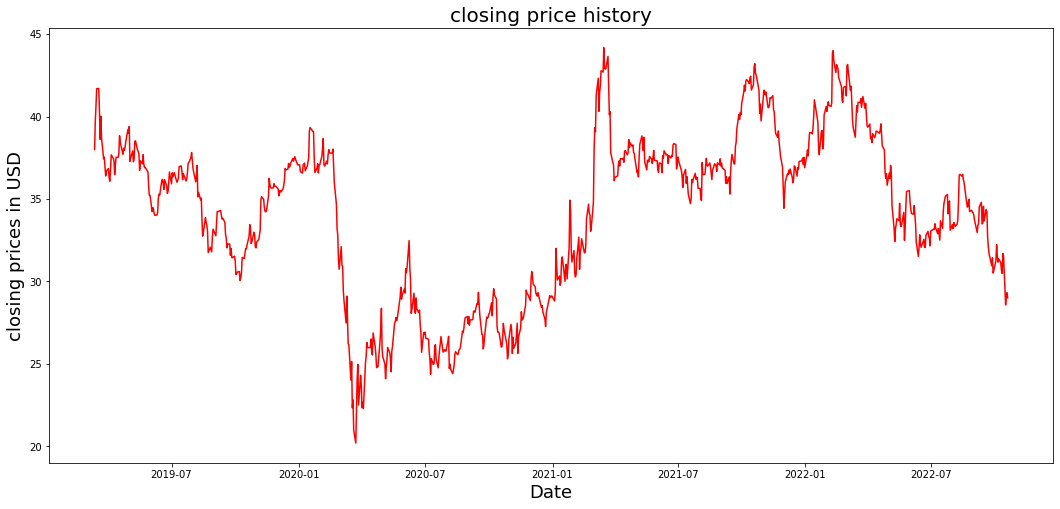

In [5]:
plt.figure(figsize=(18, 8))
plt.title('closing price history', fontsize=20)
plt.plot(rawStockData['Close'], linewidth=1.5, color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('closing prices in USD', fontsize=18)
plt.show()

## cleaning the data

In [6]:
# resetting the index from date to incrementing numeric values
rawStockData.reset_index(inplace=True)

# eliminating null values, if any
rawStockData.dropna(inplace=True)

# converting the date values from YYYY-MM-DD HH:MM:SS to YYYY-MM-DD
rawStockData['Date'] =rawStockData['Date'].dt.normalize()

In [7]:
rawStockData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-12,38.000000,38.000000,38.000000,38.000000,36.012314,10000
1,2019-03-13,39.000000,39.900002,38.700001,39.750000,37.670776,20477400
2,2019-03-14,39.750000,41.400002,39.750000,40.650002,38.523708,6248600
3,2019-03-15,41.380001,41.869999,41.240002,41.700001,39.518780,7107300
4,2019-03-18,41.950001,41.950001,41.049999,41.700001,39.518780,4020900
...,...,...,...,...,...,...,...
907,2022-10-14,31.860001,32.189999,31.389999,31.549999,31.549999,2151700
908,2022-10-17,29.740000,30.090000,28.270000,28.580000,28.580000,12668500
909,2022-10-18,29.299999,29.915001,28.705000,29.200001,29.200001,6942800
910,2022-10-19,29.320000,29.860001,28.855000,29.320000,29.320000,4065300


## creating the dataset only with the 'Close' column to perform rest of the operations

In [8]:
dataset = rawStockData['Close'].values